In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'train.jsonl')
DEV_PATH = os.path.join(DATA_PATH, 'dev.jsonl')

dfs = {'train': pd.read_json(TRAIN_PATH, lines=True),
       'dev': pd.read_json(DEV_PATH, lines=True)
       }
for key, df in dfs.items():
    df['split'] = key

data = pd.concat([v for v in dfs.values()])

print('train:', dfs['train'].shape)
print('dev:', dfs['dev'].shape)

train: (9427, 5)
dev: (3270, 5)


In [3]:
data.head()

,question,title,answer,passage,split
0,do iran and afghanistan speak the same language,Persian language,True,"Persian (/ˈpɜːrʒən, -ʃən/), also known by its ...",train
1,do good samaritan laws protect those who help ...,Good Samaritan law,True,Good Samaritan laws offer legal protection to ...,train
2,is windows movie maker part of windows essentials,Windows Movie Maker,True,Windows Movie Maker (formerly known as Windows...,train
3,is confectionary sugar the same as powdered sugar,Powdered sugar,True,"Powdered sugar, also called confectioners' sug...",train
4,is elder scrolls online the same as skyrim,The Elder Scrolls Online,False,As with other games in The Elder Scrolls serie...,train


### Explaratory Analysis

In [4]:
colors= ["#70CF97", "#4185F4"]
PALETTE = sns.set_palette(sns.color_palette(colors))

##### 1. True/False distribution in dataset

In [5]:
data.split.value_counts()

train    9427
dev      3270
Name: split, dtype: int64

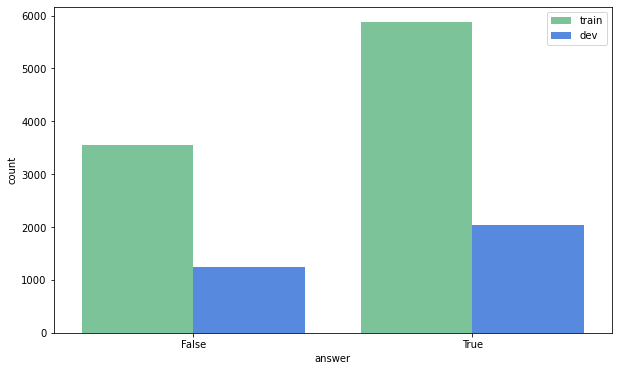

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='answer', hue='split', data=data, palette=sns.color_palette(PALETTE))
plt.legend(loc="upper right")
plt.show()

##### 2. Question length distribution

In [7]:
data['q_len'] = data.question.apply(lambda x: len(x.split()))
avg_q_len = int(data.q_len.mean())
avg_q_len

8

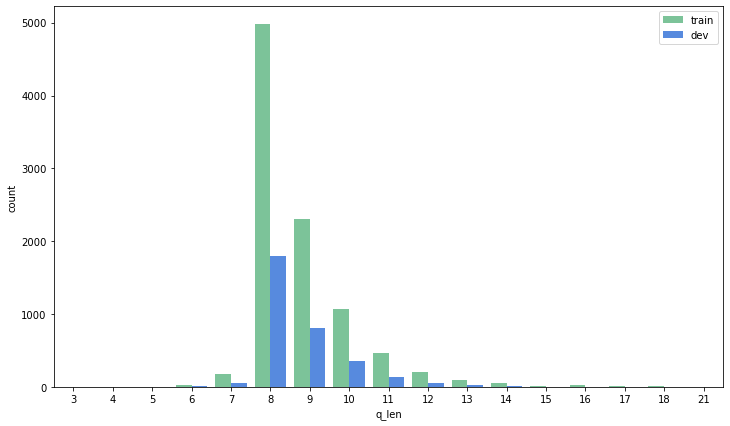

In [8]:
plt.figure(figsize=(12,7))
sns.countplot(x='q_len', hue='split', data=data, palette=sns.color_palette(PALETTE))
plt.legend(loc="upper right")
plt.show()

##### 3. Passage length distribution

In [9]:
data['pas_len'] = data.passage.apply(lambda x: len(x.split()))
avg_pas_len = int(data.pas_len.mean())
avg_pas_len

92

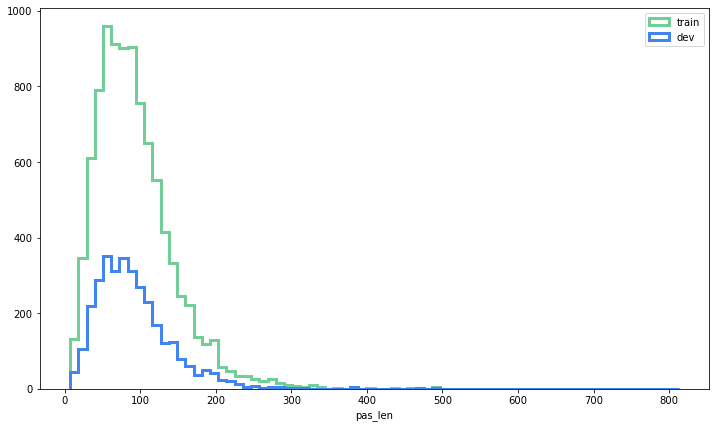

In [10]:
plt.figure(figsize=(12,7))
bins_ = np.linspace(min(data.pas_len), max(data.pas_len), num = 75)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    sns.distplot(data.loc[data['split'] == 'train', 'pas_len'], kde=False, bins = bins_,
                 kde_kws = {"color": colors[0], "alpha": 1, "lw": 3, "label":"train"},
                 hist_kws = {"histtype":"step", "linewidth":3, "alpha": 1,
                             "color": colors[0], "edgecolor" : colors[0], "label":"train"})

    sns.distplot(data.loc[data['split'] == 'dev', 'pas_len'], kde=False, bins = bins_,
                 kde_kws = {"color": colors[1], "alpha": 1, "lw": 3, "label":"dev"},
                 hist_kws = {"histtype":"step", "linewidth":3, "alpha": 1,
                             "color": colors[1], "edgecolor" : colors[1], "label":"dev"})

plt.legend(loc="upper right")
plt.show()